In [ ]:
import pandas as pd 
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

## Data Preparation

In [ ]:
data = pd.read_csv("Combined 35 Tech Companies.csv")
data.reset_index()

,index,Date,Close,Volume,OpenInt,EGS,Company_Name,day,year,month,...,lag42,lag43,lag44,lag45,lag46,lag47,lag48,lag49,lag50,Tomorrow_Close
0,0,3/1/1980,0.26459,12665490,0,2,INTC,3,1980,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.26459
1,1,4/1/1980,0.26459,13431648,0,2,INTC,4,1980,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.26459
2,2,7/1/1980,0.26459,11564146,0,2,INTC,0,1980,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.28077
3,3,8/1/1980,0.28077,15586456,0,2,INTC,1,1980,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.28868
4,4,9/1/1980,0.28868,19656654,0,2,INTC,2,1980,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.28868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168242,168242,10/11/2017,111.12000,2161752,0,1,SWKS,4,2017,11,...,106.800,106.870,107.190,104.640,106.430,106.170,106.93,105.570,105.360,110.41000
168243,168243,10/11/2017,52.33000,1023885,0,0,TEAM,4,2017,11,...,33.820,33.800,35.030,34.370,34.460,34.390,34.90,34.900,35.600,52.40000
168244,168244,10/11/2017,97.05000,4239733,0,1,TXN,4,2017,11,...,82.174,82.363,81.697,80.863,81.469,81.548,81.33,82.015,82.293,96.94000
168245,168245,10/11/2017,109.42000,497915,0,1,VRSN,4,2017,11,...,103.320,103.730,104.650,103.310,103.480,102.790,102.54,103.940,103.750,109.75000


In [ ]:
data.columns

Index(['Date', 'Close', 'Volume', 'OpenInt', 'EGS', 'Company_Name', 'day',
       'year', 'month', 'h-c', 'c-l', 'c-o', 'ewm10', 'ewm50', 'ewm100',
       'ewm200', 'ma10', 'ma50', 'ma100', 'ma200', 'std10', 'std50', 'std100',
       'std200', 'UB', 'LB', 'lag2', 'lag3', 'lag4', 'lag5', 'lag6', 'lag7',
       'lag8', 'lag9', 'lag10', 'lag11', 'lag12', 'lag13', 'lag14', 'lag15',
       'lag16', 'lag17', 'lag18', 'lag19', 'lag20', 'lag21', 'lag22', 'lag23',
       'lag24', 'lag25', 'lag26', 'lag27', 'lag28', 'lag29', 'lag30', 'lag31',
       'lag32', 'lag33', 'lag34', 'lag35', 'lag36', 'lag37', 'lag38', 'lag39',
       'lag40', 'lag41', 'lag42', 'lag43', 'lag44', 'lag45', 'lag46', 'lag47',
       'lag48', 'lag49', 'lag50', 'Tomorrow_Close'],
      dtype='object')

In [ ]:
len(data)

168247

In [ ]:
data = data.dropna()

In [ ]:
len(data)

161330

In [ ]:
data.head()

,Date,Close,Volume,OpenInt,EGS,Company_Name,day,year,month,h-c,...,lag42,lag43,lag44,lag45,lag46,lag47,lag48,lag49,lag50,Tomorrow_Close
199,15/10/1980,0.40097,8296020,0,2,INTC,2,1980,10,0.00817,...,0.37681,0.37681,0.37681,0.38489,0.38489,0.36091,0.36091,0.35285,0.35285,0.40914
200,16/10/1980,0.40914,5506736,0,2,INTC,3,1980,10,0.00793,...,0.36091,0.37681,0.37681,0.37681,0.38489,0.38489,0.36091,0.36091,0.35285,0.40914
201,17/10/1980,0.40914,7410151,0,2,INTC,4,1980,10,0.00793,...,0.36091,0.36091,0.37681,0.37681,0.37681,0.38489,0.38489,0.36091,0.36091,0.40914
202,20/10/1980,0.40914,8715007,0,2,INTC,0,1980,10,0.00000,...,0.36881,0.36091,0.36091,0.37681,0.37681,0.37681,0.38489,0.38489,0.36091,0.40097
203,21/10/1980,0.40097,8092510,0,2,INTC,1,1980,10,0.00000,...,0.36881,0.36881,0.36091,0.36091,0.37681,0.37681,0.37681,0.38489,0.38489,0.39291


In [ ]:
data = data.reset_index()

In [ ]:
X = data.loc[:, "Close":"lag50"]

In [ ]:
X = X.drop("Company_Name", axis = 1)

In [ ]:
X.head()

,Close,Volume,OpenInt,EGS,day,year,month,h-c,c-l,c-o,...,lag41,lag42,lag43,lag44,lag45,lag46,lag47,lag48,lag49,lag50
0,0.40097,8296020,0,2,2,1980,10,0.00817,0.0,0.0,...,0.36091,0.37681,0.37681,0.37681,0.38489,0.38489,0.36091,0.36091,0.35285,0.35285
1,0.40914,5506736,0,2,3,1980,10,0.00793,0.0,0.0,...,0.36091,0.36091,0.37681,0.37681,0.37681,0.38489,0.38489,0.36091,0.36091,0.35285
2,0.40914,7410151,0,2,4,1980,10,0.00793,0.0,0.0,...,0.36881,0.36091,0.36091,0.37681,0.37681,0.37681,0.38489,0.38489,0.36091,0.36091
3,0.40914,8715007,0,2,0,1980,10,0.00000,0.0,0.0,...,0.36881,0.36881,0.36091,0.36091,0.37681,0.37681,0.37681,0.38489,0.38489,0.36091
4,0.40097,8092510,0,2,1,1980,10,0.00000,0.0,0.0,...,0.36881,0.36881,0.36881,0.36091,0.36091,0.37681,0.37681,0.37681,0.38489,0.38489


In [ ]:
egs = ["zero", "one", "two"]
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']
for i in range(len(X)):
  X['month'][i] = months[X['month'][i]-1]
  X['day'][i] = days[X['day'][i]]
  X['EGS'][i]= egs[X['EGS'][i]]

/var/folders/n5/gkbdqwls1h17gjm6d68_h8ph0000gn/T/ipykernel_77284/3095439742.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['month'][i] = months[X['month'][i]-1]
/Users/zhangaijia/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/var/folders/n5/gkbdqwls1h17gjm6d68_h8ph0000gn/T/ipykernel_77284/3095439742.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

In [ ]:
X.head()

,Close,Volume,OpenInt,EGS,day,year,month,h-c,c-l,c-o,...,lag41,lag42,lag43,lag44,lag45,lag46,lag47,lag48,lag49,lag50
0,0.40097,8296020,0,two,Wed,1980,Oct,0.00817,0.0,0.0,...,0.36091,0.37681,0.37681,0.37681,0.38489,0.38489,0.36091,0.36091,0.35285,0.35285
1,0.40914,5506736,0,two,Thu,1980,Oct,0.00793,0.0,0.0,...,0.36091,0.36091,0.37681,0.37681,0.37681,0.38489,0.38489,0.36091,0.36091,0.35285
2,0.40914,7410151,0,two,Fri,1980,Oct,0.00793,0.0,0.0,...,0.36881,0.36091,0.36091,0.37681,0.37681,0.37681,0.38489,0.38489,0.36091,0.36091
3,0.40914,8715007,0,two,Mon,1980,Oct,0.00000,0.0,0.0,...,0.36881,0.36881,0.36091,0.36091,0.37681,0.37681,0.37681,0.38489,0.38489,0.36091
4,0.40097,8092510,0,two,Tue,1980,Oct,0.00000,0.0,0.0,...,0.36881,0.36881,0.36881,0.36091,0.36091,0.37681,0.37681,0.37681,0.38489,0.38489


In [ ]:
X = pd.get_dummies(data=X, drop_first=False)

In [ ]:
X.head()

,Close,Volume,OpenInt,year,h-c,c-l,c-o,ewm10,ewm50,ewm100,...,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,0.40097,8296020,0,1980,0.00817,0.0,0.0,0.395752,0.372162,0.348589,...,0,0,0,0,0,0,0,0,1,0
1,0.40914,5506736,0,1980,0.00793,0.0,0.0,0.398186,0.373612,0.349810,...,0,0,0,0,0,0,0,0,1,0
2,0.40914,7410151,0,1980,0.00793,0.0,0.0,0.400178,0.375006,0.351006,...,0,0,0,0,0,0,0,0,1,0
3,0.40914,8715007,0,1980,0.00000,0.0,0.0,0.401807,0.376345,0.352177,...,0,0,0,0,0,0,0,0,1,0
4,0.40097,8092510,0,1980,0.00000,0.0,0.0,0.401655,0.377311,0.353160,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
X.drop('month_Jan', axis=1, inplace=True)
X.drop("day_Mon", axis=1, inplace=True)
X.drop("EGS_zero", axis = 1, inplace=True)
X.drop("OpenInt", axis = 1, inplace=True)

In [ ]:
X.head()

,Close,Volume,year,h-c,c-l,c-o,ewm10,ewm50,ewm100,ewm200,...,month_Aug,month_Dec,month_Feb,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,0.40097,8296020,1980,0.00817,0.0,0.0,0.395752,0.372162,0.348589,0.327908,...,0,0,0,0,0,0,0,0,1,0
1,0.40914,5506736,1980,0.00793,0.0,0.0,0.398186,0.373612,0.349810,0.328841,...,0,0,0,0,0,0,0,0,1,0
2,0.40914,7410151,1980,0.00793,0.0,0.0,0.400178,0.375006,0.351006,0.329762,...,0,0,0,0,0,0,0,0,1,0
3,0.40914,8715007,1980,0.00000,0.0,0.0,0.401807,0.376345,0.352177,0.330672,...,0,0,0,0,0,0,0,0,1,0
4,0.40097,8092510,1980,0.00000,0.0,0.0,0.401655,0.377311,0.353160,0.331476,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
Y = data["Tomorrow_Close"]

In [ ]:
X_test = X.tail(30000)
Y_test = Y.tail(30000)

In [ ]:
X_test

,Close,Volume,year,h-c,c-l,c-o,ewm10,ewm50,ewm100,ewm200,...,month_Aug,month_Dec,month_Feb,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
131330,81.190,382287,2014,0.752,0.490,-0.260,82.600160,82.833075,83.257915,81.987836,...,0,0,0,0,0,1,0,0,0,0
131331,59.763,2494793,2014,0.117,2.582,1.333,58.851388,54.132910,49.919022,44.720392,...,0,0,0,0,0,1,0,0,0,0
131332,174.180,4052786,2014,1.270,4.920,2.420,175.621760,169.917644,163.563615,149.881461,...,0,0,0,0,0,1,0,0,0,0
131333,15.520,2540762,2014,0.080,0.165,-0.010,15.531756,14.705522,14.329646,14.059103,...,0,0,0,0,0,1,0,0,0,0
131334,51.360,4430526,2014,0.438,1.074,-0.379,52.020034,49.865588,47.616333,44.114624,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161325,111.120,2161752,2017,1.480,1.590,-0.590,111.356977,106.983353,104.741142,99.776384,...,0,0,0,0,0,0,0,1,0,0
161326,52.330,1023885,2017,0.130,1.050,0.050,50.402332,42.837982,39.463636,36.153968,...,0,0,0,0,0,0,0,1,0,0
161327,97.050,4239733,2017,0.980,1.420,-0.550,97.153276,91.313149,87.082707,82.025967,...,0,0,0,0,0,0,0,1,0,0
161328,109.420,497915,2017,0.200,0.960,-0.040,109.108105,106.525932,102.705838,96.958312,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
X_train = X[:131330]
Y_train = Y[:131330]

In [ ]:
X_train

,Close,Volume,year,h-c,c-l,c-o,ewm10,ewm50,ewm100,ewm200,...,month_Aug,month_Dec,month_Feb,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,0.40097,8296020,1980,0.00817,0.000,0.000,0.395752,0.372162,0.348589,0.327908,...,0,0,0,0,0,0,0,0,1,0
1,0.40914,5506736,1980,0.00793,0.000,0.000,0.398186,0.373612,0.349810,0.328841,...,0,0,0,0,0,0,0,0,1,0
2,0.40914,7410151,1980,0.00793,0.000,0.000,0.400178,0.375006,0.351006,0.329762,...,0,0,0,0,0,0,0,0,1,0
3,0.40914,8715007,1980,0.00000,0.000,0.000,0.401807,0.376345,0.352177,0.330672,...,0,0,0,0,0,0,0,0,1,0
4,0.40097,8092510,1980,0.00000,0.000,0.000,0.401655,0.377311,0.353160,0.331476,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131325,68.06000,2433603,2014,0.04000,1.310,1.000,68.122016,64.106186,60.287052,54.950559,...,0,0,0,0,0,1,0,0,0,0
131326,47.15900,1635168,2014,0.00000,0.549,0.500,46.818284,45.555591,44.780004,43.371396,...,0,0,0,0,0,1,0,0,0,0
131327,52.34000,1982479,2014,0.27000,0.710,-0.250,53.104171,51.706788,48.835162,44.983838,...,0,0,0,0,0,1,0,0,0,0
131328,18.40200,10802911,2014,0.01000,0.554,0.387,18.112920,17.149781,16.587655,15.638892,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
#tscv = TimeSeriesSplit(n_splits = 5)
#tscv = TimeSeriesSplit(n_splits = 3)
tscv = TimeSeriesSplit(n_splits = 3, max_train_size=30000)


In [ ]:
Y_train = np.array(Y_train).reshape(-1,1)
Y_test = np.array(Y_test).reshape(-1,1)


### Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [ ]:
X.columns

Index(['Close', 'Volume', 'year', 'h-c', 'c-l', 'c-o', 'ewm10', 'ewm50',
       'ewm100', 'ewm200', 'ma10', 'ma50', 'ma100', 'ma200', 'std10', 'std50',
       'std100', 'std200', 'UB', 'LB', 'lag2', 'lag3', 'lag4', 'lag5', 'lag6',
       'lag7', 'lag8', 'lag9', 'lag10', 'lag11', 'lag12', 'lag13', 'lag14',
       'lag15', 'lag16', 'lag17', 'lag18', 'lag19', 'lag20', 'lag21', 'lag22',
       'lag23', 'lag24', 'lag25', 'lag26', 'lag27', 'lag28', 'lag29', 'lag30',
       'lag31', 'lag32', 'lag33', 'lag34', 'lag35', 'lag36', 'lag37', 'lag38',
       'lag39', 'lag40', 'lag41', 'lag42', 'lag43', 'lag44', 'lag45', 'lag46',
       'lag47', 'lag48', 'lag49', 'lag50', 'EGS_one', 'EGS_two', 'day_Fri',
       'day_Thu', 'day_Tue', 'day_Wed', 'month_Apr', 'month_Aug', 'month_Dec',
       'month_Feb', 'month_Jul', 'month_Jun', 'month_Mar', 'month_May',
       'month_Nov', 'month_Oct', 'month_Sep'],
      dtype='object')

In [ ]:
X_train_cont = X_train.loc[:, :"lag50"]
X_test_cont = X_test.loc[:, :"lag50"]

In [ ]:
X_train_discrete = X_train.loc[:,'EGS_one':'month_Sep']
X_test_discrete = X_test.loc[:,'EGS_one':'month_Sep']

In [ ]:
scaler.fit(X_train_cont)
X_train_cont_scaled = pd.DataFrame(scaler.transform(X_train_cont))
X_test_cont_scaled = pd.DataFrame(scaler.transform(X_test_cont))

In [ ]:
X_train_cont_scaled

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
0,-0.570437,-0.337498,-2.718544,-0.455498,-0.479176,0.003352,-0.571873,-0.577809,-0.584010,-0.593386,...,-0.578575,-0.578329,-0.578495,-0.578671,-0.578637,-0.578799,-0.579576,-0.579738,-0.580115,-0.580273
1,-0.570233,-0.400513,-2.718544,-0.455795,-0.479176,0.003352,-0.571812,-0.577772,-0.583978,-0.593360,...,-0.578575,-0.578741,-0.578495,-0.578671,-0.578847,-0.578799,-0.578952,-0.579738,-0.579905,-0.580273
2,-0.570233,-0.357511,-2.718544,-0.455795,-0.479176,0.003352,-0.571762,-0.577736,-0.583947,-0.593335,...,-0.578371,-0.578741,-0.578907,-0.578671,-0.578847,-0.579009,-0.578952,-0.579114,-0.579905,-0.580063
3,-0.570233,-0.328032,-2.718544,-0.465602,-0.479176,0.003352,-0.571721,-0.577702,-0.583916,-0.593310,...,-0.578371,-0.578536,-0.578907,-0.579083,-0.578847,-0.579009,-0.579163,-0.579114,-0.579280,-0.580063
4,-0.570437,-0.342096,-2.718544,-0.465602,-0.479176,0.003352,-0.571725,-0.577677,-0.583890,-0.593288,...,-0.578371,-0.578536,-0.578702,-0.579083,-0.579260,-0.579009,-0.579163,-0.579324,-0.579280,-0.579438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131325,1.120509,-0.469940,1.480192,-0.416133,1.151038,1.115971,1.128973,1.055473,0.986575,0.892484,...,0.928294,0.953482,0.943200,0.939409,0.942355,0.921361,0.949466,0.953947,0.970431,0.962941
131326,0.598148,-0.487978,1.480192,-0.465602,0.204020,0.559662,0.593961,0.580085,0.580239,0.577502,...,0.556435,0.572686,0.573229,0.578534,0.576549,0.571208,0.578589,0.571626,0.611285,0.610253
131327,0.727632,-0.480132,1.480192,-0.131684,0.404375,-0.274803,0.751822,0.737719,0.686498,0.621364,...,0.746401,0.744763,0.735602,0.714770,0.701167,0.672699,0.682659,0.692647,0.721415,0.703032
131328,-0.120552,-0.280863,1.480192,-0.453235,0.210242,0.433936,-0.126932,-0.147857,-0.158493,-0.176889,...,-0.167489,-0.163657,-0.165185,-0.164485,-0.165551,-0.167244,-0.161759,-0.160588,-0.157200,-0.161678


In [ ]:
X_test_discrete = X_test_discrete.reset_index()

In [ ]:
X_test_discrete = X_test_discrete.drop("index", axis = 1)

In [ ]:
X_train_scaled = pd.concat([X_train_cont_scaled, X_train_discrete], axis = 1)
X_test_scaled = pd.concat([X_test_cont_scaled, X_test_discrete], axis = 1)

In [ ]:
X_test_scaled

,0,1,2,3,4,5,6,7,8,9,...,month_Aug,month_Dec,month_Feb,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,1.448657,-0.516283,1.480192,0.464421,0.130598,-0.285929,1.492571,1.535378,1.588487,1.627963,...,0,0,0,0,0,1,0,0,0,0
1,0.913149,-0.468558,1.480192,-0.320905,2.733963,1.486474,0.896155,0.799892,0.714899,0.614198,...,0,0,0,0,0,1,0,0,0,0
2,3.772680,-0.433360,1.480192,1.105049,5.643460,2.695891,3.828672,3.767052,3.692761,3.474835,...,0,0,0,0,0,1,0,0,0,0
3,-0.192580,-0.467519,1.480192,-0.366664,-0.273844,-0.007774,-0.191754,-0.210495,-0.217660,-0.219864,...,0,0,0,0,0,1,0,0,0,0
4,0.703140,-0.424826,1.480192,0.076087,0.857350,-0.418331,0.724595,0.690536,0.654561,0.597720,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2.196673,-0.476082,1.850668,1.364763,1.499481,-0.653094,2.214756,2.154265,2.151419,2.111855,...,0,0,0,0,0,0,0,1,0,0
29996,0.727382,-0.501788,1.850668,-0.304827,0.827484,0.058983,0.683969,0.510442,0.440933,0.381171,...,0,0,0,0,0,0,0,1,0,0
29997,1.845033,-0.429137,1.850668,0.746396,1.287926,-0.608589,1.858051,1.752692,1.688710,1.629001,...,0,0,0,0,0,0,0,1,0,0
29998,2.154186,-0.513671,1.850668,-0.218256,0.715484,-0.041153,2.158279,2.142543,2.098087,2.035197,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
col_names = ['Close', 'Volume', 'year', 'h-c', 'c-l', 'c-o', 'ewm10', 'ewm50',
       'ewm100', 'ewm200', 'ma10', 'ma50', 'ma100', 'ma200', 'std10', 'std50',
       'std100', 'std200', 'UB', 'LB', 'lag2', 'lag3', 'lag4', 'lag5', 'lag6',
       'lag7', 'lag8', 'lag9', 'lag10', 'lag11', 'lag12', 'lag13', 'lag14',
       'lag15', 'lag16', 'lag17', 'lag18', 'lag19', 'lag20', 'lag21', 'lag22',
       'lag23', 'lag24', 'lag25', 'lag26', 'lag27', 'lag28', 'lag29', 'lag30',
       'lag31', 'lag32', 'lag33', 'lag34', 'lag35', 'lag36', 'lag37', 'lag38',
       'lag39', 'lag40', 'lag41', 'lag42', 'lag43', 'lag44', 'lag45', 'lag46',
       'lag47', 'lag48', 'lag49', 'lag50', 'EGS_one', 'EGS_two', 'day_Fri',
       'day_Thu', 'day_Tue', 'day_Wed', 'month_Apr', 'month_Aug', 'month_Dec',
       'month_Feb', 'month_Jul', 'month_Jun', 'month_Mar', 'month_May',
       'month_Nov', 'month_Oct', 'month_Sep']

In [ ]:
X_train_scaled.columns = col_names
X_test_scaled.columns = col_names

In [ ]:
X_test_scaled

,Close,Volume,year,h-c,c-l,c-o,ewm10,ewm50,ewm100,ewm200,...,month_Aug,month_Dec,month_Feb,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,1.448657,-0.516283,1.480192,0.464421,0.130598,-0.285929,1.492571,1.535378,1.588487,1.627963,...,0,0,0,0,0,1,0,0,0,0
1,0.913149,-0.468558,1.480192,-0.320905,2.733963,1.486474,0.896155,0.799892,0.714899,0.614198,...,0,0,0,0,0,1,0,0,0,0
2,3.772680,-0.433360,1.480192,1.105049,5.643460,2.695891,3.828672,3.767052,3.692761,3.474835,...,0,0,0,0,0,1,0,0,0,0
3,-0.192580,-0.467519,1.480192,-0.366664,-0.273844,-0.007774,-0.191754,-0.210495,-0.217660,-0.219864,...,0,0,0,0,0,1,0,0,0,0
4,0.703140,-0.424826,1.480192,0.076087,0.857350,-0.418331,0.724595,0.690536,0.654561,0.597720,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2.196673,-0.476082,1.850668,1.364763,1.499481,-0.653094,2.214756,2.154265,2.151419,2.111855,...,0,0,0,0,0,0,0,1,0,0
29996,0.727382,-0.501788,1.850668,-0.304827,0.827484,0.058983,0.683969,0.510442,0.440933,0.381171,...,0,0,0,0,0,0,0,1,0,0
29997,1.845033,-0.429137,1.850668,0.746396,1.287926,-0.608589,1.858051,1.752692,1.688710,1.629001,...,0,0,0,0,0,0,0,1,0,0
29998,2.154186,-0.513671,1.850668,-0.218256,0.715484,-0.041153,2.158279,2.142543,2.098087,2.035197,...,0,0,0,0,0,0,0,1,0,0


### Principle component regression

In [ ]:
import sklearn.model_selection
from sklearn.decomposition import PCA


In [ ]:
pca = PCA()


In [ ]:
pca.fit(X_train_scaled)
X_train_reduced = pca.transform(X_train_scaled)
X_test_reduced = pca.transform(X_test_scaled)

In [ ]:
X_train_reduced.shape

(131330, 86)

In [ ]:
lr_pca = LinearRegression()

In [ ]:
cross_val_score(lr_pca,
               X_train_reduced, Y_train, cv=tscv, scoring='neg_root_mean_squared_error').mean()

-1.2638993060083996

Text(0.5, 1.0, 'validation score vs number of principal components')

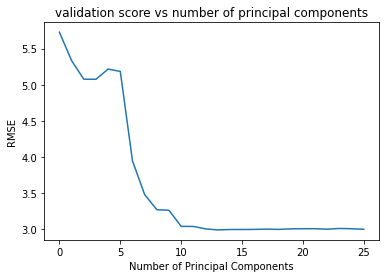

In [ ]:
rmse = []
for i in np.arange(1, 27):
    score = -1*sklearn.model_selection.cross_val_score(lr_pca,
               X_train_reduced[:,:i], Y_train, cv=tscv, scoring='neg_root_mean_squared_error').mean()
    rmse.append(score)

plt.plot(rmse)
plt.xlabel('Number of Principal Components')
plt.ylabel('RMSE')
plt.title('validation score vs number of principal components')

In [ ]:
lr_pca.fit(X_train_reduced, Y_train)
Y_train_reduced_pred = lr_pca.predict(X_train_reduced)
Y_test_reduced_pred = lr_pca.predict(X_test_reduced)
print(np.sqrt(sklearn.metrics.mean_squared_error(Y_train, Y_train_reduced_pred)))
print(np.sqrt(sklearn.metrics.mean_squared_error(Y_test, Y_test_reduced_pred)))

1.0599531575802543
2.7314199820486853


#### PCA + Ridge

In [ ]:
ridge_pca = Ridge()
ridge_pca_cv = GridSearchCV(ridge_pca, param_grid, cv=tscv, scoring = 'neg_root_mean_squared_error')
ridge_pca_cv.fit(X_train_reduced, Y_train)
print(ridge_pca_cv.best_params_)
print(ridge_pca_cv.best_score_)

/Users/zhangaijia/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=6.12039e-33): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/zhangaijia/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.29332e-34): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/zhangaijia/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.3096e-34): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


{'alpha': 0.10101010101010101}
-1.2666618351060392


In [ ]:
cross_val_score(Ridge(alpha=0),
               X_train_reduced, Y_train, cv=tscv, scoring='neg_root_mean_squared_error').mean()

/Users/zhangaijia/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=6.12039e-33): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/zhangaijia/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.29332e-34): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/zhangaijia/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.3096e-34): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


-1.268121397611173

In [ ]:
cross_val_score(Ridge(alpha=0.1),
               X_train_reduced, Y_train, cv=tscv, scoring='neg_root_mean_squared_error').mean()

-1.2666355294472007

#### PCA + RFE

In [ ]:
linreg_pca_rfe = LinearRegression()
pca_rfecv = RFECV(estimator=linreg_pca_rfe, cv=tscv, scoring='neg_root_mean_squared_error')
pca_rfecv.fit(X_train_reduced, Y_train)

RFECV(cv=TimeSeriesSplit(gap=0, max_train_size=30000, n_splits=3, test_size=None),
      estimator=LinearRegression(), scoring='neg_root_mean_squared_error')

In [ ]:
X_train_pca_rfe = pca_rfecv.transform(X_train_reduced)

X_test_pca_rfe = pca_rfecv.transform(X_test_reduced)


In [ ]:
X_train_pca_rfe.shape[1]

86

In [ ]:
linreg_pca_rfe.fit(X_train_pca_rfe, Y_train)
Y_train_pca_rfe_pred = linreg_pca_rfe.predict(X_train_pca_rfe)
Y_test_pca_rfe_pred = linreg_pca_rfe.predict(X_test_pca_rfe)
print(sklearn.metrics.mean_squared_error(Y_train, Y_train_pca_rfe_pred))
print(sklearn.metrics.mean_squared_error(Y_test, Y_test_pca_rfe_pred))

1.1235007118484472
7.460617200655451


In [ ]:
pca_ridge_rfe = Ridge()
pca_ridge_rfe_cv = GridSearchCV(pca_ridge_rfe, param_grid, cv=tscv, scoring = 'neg_root_mean_squared_error')
pca_ridge_rfe_cv.fit(X_train_pca_rfe, Y_train)
print(pca_ridge_rfe_cv.best_params_)
print(pca_ridge_rfe_cv.best_score_)

/Users/zhangaijia/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=5.91714e-33): result may not be accurate.

/Users/zhangaijia/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=5.69544e-34): result may not be accurate.

/Users/zhangaijia/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=4.93182e-34): result may not be accurate.



{'alpha': 0.0}
-1.2564247227752616


/Users/zhangaijia/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=5.55825e-34): result may not be accurate.

